<a href="https://colab.research.google.com/github/Sanjay550055/E-commerce-website/blob/main/Unemployement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
           Region         Date  Frequency   Estimate

<ipython-input-4-22b7e086c765>:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['Date'], errors='coerce').notna()]
<ipython-input-4-22b7e086c765>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region", bbox_to_anchor=(1, 1))


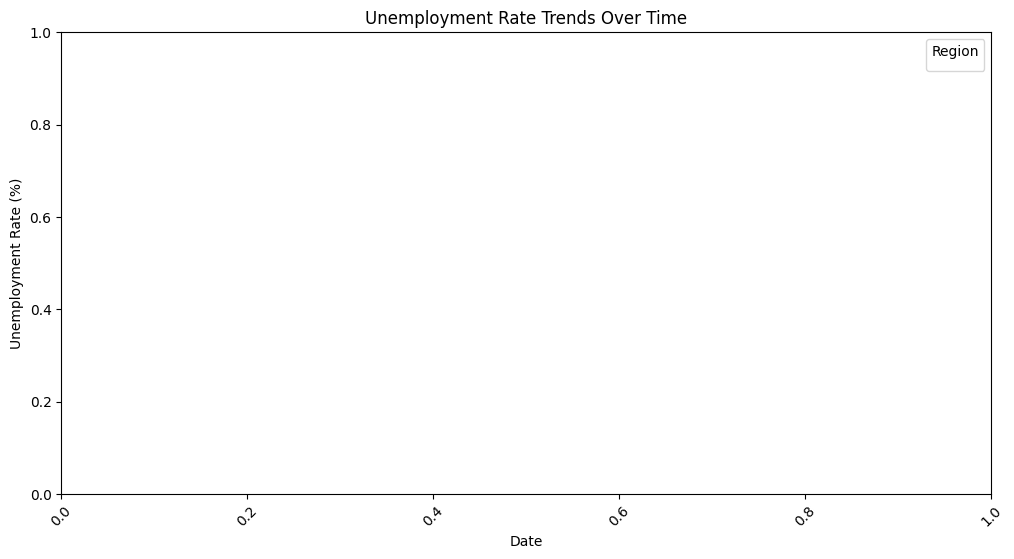

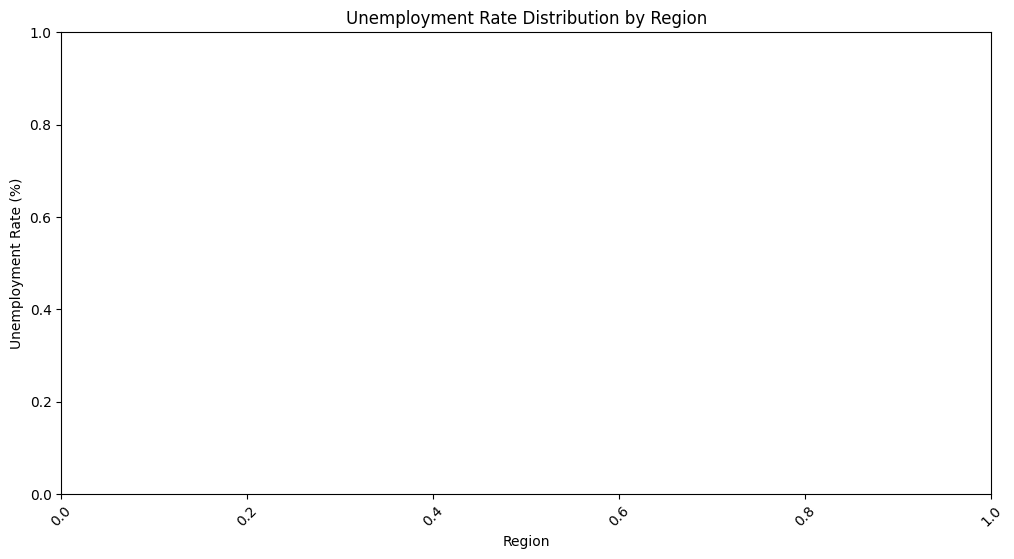

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


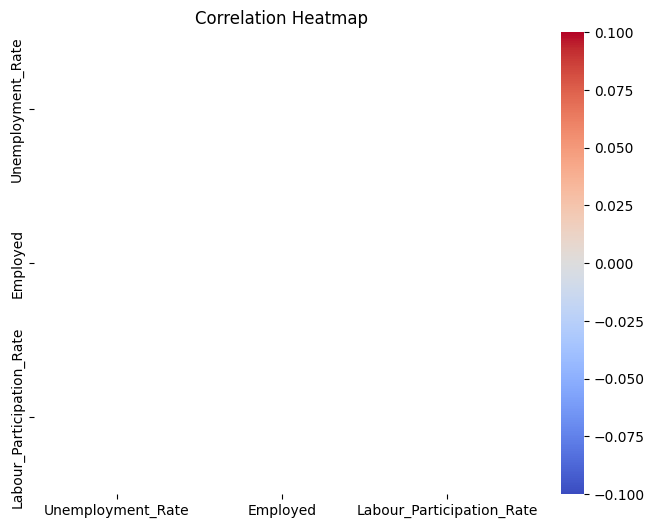

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/mnt/data/Unemployment_Rate_upto_11_2020.csv"
df = pd.read_csv("unem.csv")

# Display basic information
df.info()
print(df.head())

# Print column names to check structure
print("Column names:", df.columns)

# Check if the first few rows contain valid date values
print("First few values in 'Date' column:", df.iloc[:, 0].head())

# Rename columns based on actual dataset structure
df.columns = ['Date', 'State', 'Region', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Other1', 'Other2', 'Other3']

# Ensure 'Date' column has valid date values
df = df[pd.to_datetime(df['Date'], errors='coerce').notna()]
df['Date'] = pd.to_datetime(df['Date'])

# Drop unnecessary columns
columns_to_drop = ['Other1', 'Other2', 'Other3']
df.drop(columns=columns_to_drop, inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)

# Summary statistics
print(df.describe())

# Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Region', marker='o')
plt.title("Unemployment Rate Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()

# Boxplot of unemployment rate by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Unemployment_Rate')
plt.xticks(rotation=45)
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
